In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Initialisation des différentes variables
S0 = 100 # Prix initial de l'actif
K = 105 # Strike de l'option
r = 0.03 # Taux d'intérêt sans risque
sigma = 0.2 # Volatilité du sous-jacent
T = 2.0 # Maturité (en année)
num_sim = 1000 # Nombre de simulations pour MC

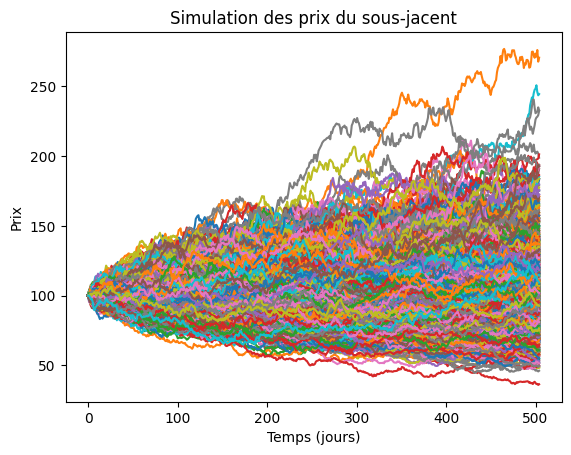

In [3]:
# Simulation des num_sim trajectoires du sous-jacent
dt = T/504 # 252 jours opérationnels
nbr_pas = int(T/dt)
S = np.zeros(shape=(nbr_pas,num_sim)) # Initialisation de la matrice des valeurs du sous-jacents
W = np.random.normal(0,np.sqrt(dt),size=(nbr_pas,num_sim)) #Initialisation de la matrice des mouvements browniens
S[0,:] = S0 # Initialisation de la première ligne à S0
for col in range(np.size(S,axis=1)):
    for ligne in range(1,np.size(S,axis=0)):
        S[ligne,col] = S[ligne-1,col]*np.exp((r-((sigma**2)/2))*dt + sigma*W[ligne,col]) # Calcul de St à chaque pas de temps (Remplissage ligne par ligne)
plt.plot(np.linspace(0, T*252, nbr_pas), S)
plt.title('Simulation des prix du sous-jacent')
plt.xlabel('Temps (jours)')
plt.ylabel('Prix')
plt.show()
     


In [4]:
# Option asiatique type "Average Price"

S_mean = np.mean(S, axis=0) # Initialisation de la matrice des moyennes
P_ap = np.zeros(shape=(1,num_sim)) # Initialisation de la matrice des Payoffs type "Average Price"

for i in range(num_sim):
    P_ap[0,i] = np.maximum(S_mean[i]-K,0)


P_ap_mean = np.mean(P_ap) # Moyenne des payoffs obtenus
print(f"Le payoff moyen de l'option asiatique type 'Average Price' est de {P_ap_mean:.3f}€")

# Option asiatique type "Average Strike"

P_as = np.zeros(shape=(1,num_sim)) # Initialisation de la matrice des Payoffs type "Average Strike"
for i in range(num_sim):
    P_as[0,i] = np.maximum(S[nbr_pas-1,i]-S_mean[i],0)
    
P_as_mean = np.mean(P_as)
print(f"Le payoff moyen de l'option asiatique type 'Average Strike' est de {P_as_mean:.3f}€")

Le payoff moyen de l'option asiatique type 'Average Price' est de 5.664€
Le payoff moyen de l'option asiatique type 'Average Strike' est de 7.705€


In [5]:
# Actualisation des payoffs pour trouver la valeur de l'option
valeur_option_ap = P_ap_mean * np.exp(-r * T)
valeur_option_as = P_as_mean * np.exp(-r * T)

print(f"Le prix de l'option asiatique type 'Average Price' actualisé est de {valeur_option_ap:.3f}€")
print(f"Le prix de l'option asiatique type 'Average Strike' actualisé est de {valeur_option_as:.3f}€")

Le prix de l'option asiatique type 'Average Price' actualisé est de 5.335€
Le prix de l'option asiatique type 'Average Strike' actualisé est de 7.257€


In [6]:
# Calcul de l'erreur
P_ap_std = np.std(P_ap,ddof=1) # Calcul des écart-types des deux payoffs avec la correction de Bessel (dénominateur : N - 1)
P_as_std = np.std(P_as,ddof=1) 

err_standard_ap = P_ap_std/np.sqrt(num_sim) # Calcul des erreurs standards
err_standard_as = P_as_std/np.sqrt(num_sim)

IC95_borne_haute_ap = valeur_option_ap + 1.96*err_standard_ap # Calcul des intervalles de confiance avec le paramètre 1.96 (95%)
IC95_borne_basse_ap = valeur_option_ap - 1.96*err_standard_ap

IC95_borne_haute_as = valeur_option_as + 1.96*err_standard_as
IC95_borne_basse_as = valeur_option_as - 1.96*err_standard_as

print("## Payoff option asiatique AVERAGE PRICE ##")
print(f"Variance : {P_ap_std}")
print(f"Erreur standard : {err_standard_ap}")
print(f"Intervalle de confiance (95%) : ({IC95_borne_basse_ap:.4f},{IC95_borne_haute_ap:.4f})")
print("\n")
print("## Payoff option asiatique AVERAGE STRIKE ##")
print(f"Variance : {P_as_std}")
print(f"Erreur standard : {err_standard_as}")
print(f"Intervalle de confiance (95%) : ({IC95_borne_basse_as:.4f},{IC95_borne_haute_as:.4f})")

## Payoff option asiatique AVERAGE PRICE ##
Variance : 10.088542954553564
Erreur standard : 0.31902774008833834
Intervalle de confiance (95%) : (4.7093,5.9599)


## Payoff option asiatique AVERAGE STRIKE ##
Variance : 12.410848270380813
Erreur standard : 0.39246548229164613
Intervalle de confiance (95%) : (6.4875,8.0259)


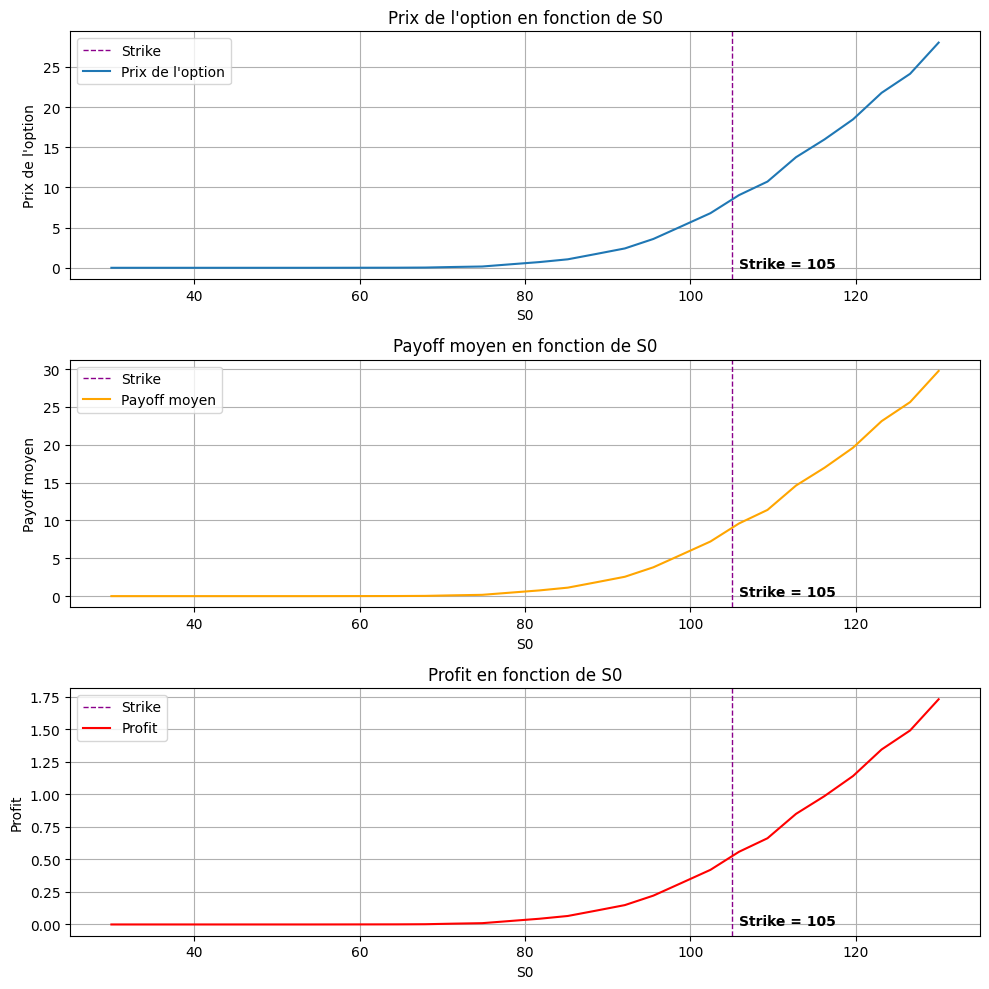

In [7]:
# Calcul du prix de l'option asiatique type "Average Price" en fonction du prix du sous-jacent à t0

num_sim = 3000
S0_bis = np.linspace(30,130,30)
prix_options = []
payoffs = []
profits = []
for S in S0_bis:
    matrice_prix = np.zeros(shape=(nbr_pas,num_sim)) # Initialisation de la matrice des valeurs du sous-jacents
    W = np.random.normal(0,np.sqrt(dt),size=(nbr_pas,num_sim)) #Initialisation de la matrice des mouvements browniens
    matrice_prix[0,:] = S # Initialisation de la première ligne à S0
    for col in range(np.size(matrice_prix,axis=1)):
        for ligne in range(1,np.size(matrice_prix,axis=0)):
            matrice_prix[ligne,col] = matrice_prix[ligne-1,col]*np.exp((r-((sigma**2)/2))*dt + sigma*W[ligne,col])
    
    moyenne_prix = np.mean(matrice_prix,axis=0)
    P = np.zeros(shape=(1,num_sim))
    for i in range(num_sim):
        P[0,i] = np.maximum(moyenne_prix[i]-K,0)
    
    P_mean = np.mean(P)
    payoffs.append(P_mean)
    
    prix_option = np.exp(-r*T)*P_mean
    prix_options.append(prix_option)
    
    profit = P_mean - prix_option
    profits.append(profit)
    
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Ajout d'une ligne verticale sur chaque graphique
for ax in [ax1, ax2, ax3]:
    ax.axvline(x=105, color='darkmagenta', linestyle='--', linewidth=1, label='Strike')
    ax.annotate('Strike = 105', xy=(105, 0), xytext=(40,-0.05), textcoords='offset points', ha='center', color='black', fontweight='bold')# Premier graphique : Prix de l'option en fonction de S0
ax1.plot(S0_bis, prix_options, label="Prix de l'option")
ax1.set_title("Prix de l'option en fonction de S0")
ax1.set_xlabel("S0")
ax1.set_ylabel("Prix de l'option")
ax1.legend()
ax1.grid(True)

# Deuxième graphique : Payoff moyen en fonction de S0
ax2.plot(S0_bis, payoffs, label="Payoff moyen", color='orange')
ax2.set_title("Payoff moyen en fonction de S0")
ax2.set_xlabel("S0")
ax2.set_ylabel("Payoff moyen")
ax2.legend()
ax2.grid(True)

# Troisième graphique : Profit en fonction de S0
ax3.plot(S0_bis, profits, label="Profit", color='red')
ax3.set_title("Profit en fonction de S0")
ax3.set_xlabel("S0")
ax3.set_ylabel("Profit")
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()
        
    

Erreur standard pour 100 simulations : 0.8299817214857077
Erreur standard pour 200 simulations : 0.7895274179872737
Erreur standard pour 300 simulations : 0.7035461988721429
Erreur standard pour 400 simulations : 0.5155248384800858
Erreur standard pour 500 simulations : 0.4132938850400574
Erreur standard pour 800 simulations : 0.3471153737578984
Erreur standard pour 1000 simulations : 0.33955888510886034
Erreur standard pour 2000 simulations : 0.22805860479879667
Erreur standard pour 4000 simulations : 0.1664256152396258
Erreur standard pour 6000 simulations : 0.13417325233419045
Erreur standard pour 8000 simulations : 0.11779406003340233
Erreur standard pour 10000 simulations : 0.10522254101915215
Erreur standard pour 12000 simulations : 0.09494470718273032


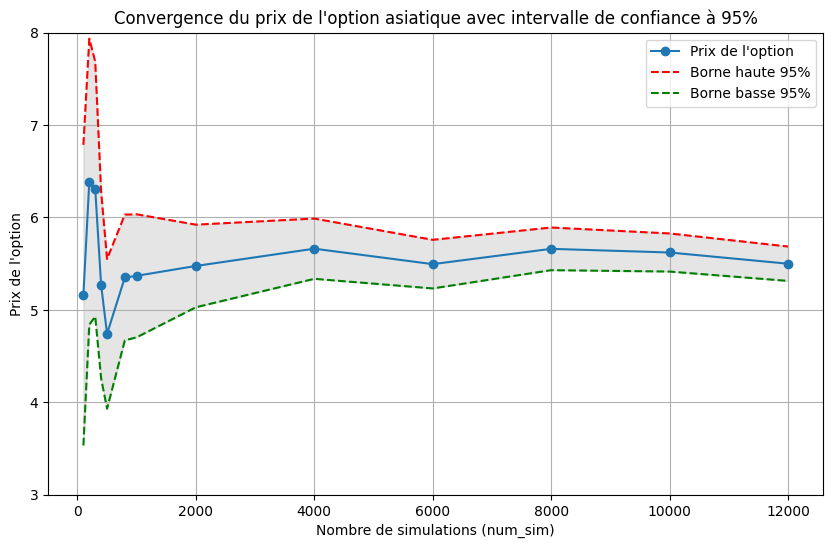

In [13]:
# Calcul de l'intervalle de confiance 95 % pour plusieurs simulations type "Average Price"

# Plage de valeurs pour num_sim
num_sim_values = [100, 200, 300, 400, 500, 800, 1000, 2000, 4000, 6000, 8000,10000,12000]

# Stockage des résultats
prix_options = []
borne_haute_95 = []
borne_basse_95 = []
erreurs = []
for sim in num_sim_values:
    # Simulation des trajectoires du sous-jacent
    dt = T / 504  # 252 jours opérationnels
    nbr_pas = int(T / dt)
    S = np.zeros(shape=(nbr_pas, sim))  # Initialisation de la matrice des valeurs du sous-jacent
    W = np.random.normal(0, np.sqrt(dt), size=(nbr_pas, sim))  # Initialisation de la matrice des mouvements browniens
   
    S[0, :] = S0  # Initialisation de la première ligne à S0
    for col in range(np.size(S, axis=1)):
        for ligne in range(1, np.size(S, axis=0)):
            S[ligne, col] = S[ligne - 1, col] * np.exp((r - ((sigma ** 2) / 2)) * dt + sigma * W[ligne, col])  # Calcul de St à chaque pas de temps

    # Calcul des moyennes des prix
    S_mean = np.mean(S,axis=0)
    # Calcul des payoffs pour l'option asiatique de type "average price"
    P_ap = np.zeros(shape=(1, sim))
    for i in range(sim):
        P_ap[0, i] = np.maximum(S_mean[i] - K, 0)

    # Calcul de la valeur moyenne des payoffs
    mean_payoff = np.mean(P_ap)
    
    prix_option = mean_payoff * np.exp(-r * T)  # Actualisation du payoff moyen pour obtenir le prix de l'option
    prix_options.append(prix_option)  

    erreur = np.std(P_ap) / np.sqrt(sim)  # Calcul de l'erreur standard du payoff
    erreurs.append(erreur)
    borne_haute_95.append(prix_option + 1.96 * erreur)  # Calcul et ajout de la borne haute de l'intervalle de confiance à 95%
    borne_basse_95.append(prix_option - 1.96 * erreur)  # Calcul et ajout de la borne basse de l'intervalle de confiance à 95%
    print(f"Erreur standard pour {sim} simulations : {erreur}")


plt.figure(figsize=(10, 6))
plt.plot(num_sim_values, prix_options, label="Prix de l'option", marker='o')
plt.plot(num_sim_values, borne_haute_95, label="Borne haute 95%", linestyle='--', color='red')
plt.plot(num_sim_values, borne_basse_95, label="Borne basse 95%", linestyle='--', color='green')
plt.fill_between(num_sim_values, borne_basse_95, borne_haute_95, color='gray', alpha=0.2)
plt.title("Convergence du prix de l'option asiatique avec intervalle de confiance à 95%")
plt.xlabel("Nombre de simulations (num_sim)")
plt.ylabel("Prix de l'option")
plt.ylim(3,8)
plt.legend()
plt.grid(True)
plt.show()

Erreur standard pour 100 simulations en utilisant une variable de contrôle : 0.5464186366896039
Erreur standard pour 200 simulations en utilisant une variable de contrôle : 0.3641484088253091
Erreur standard pour 300 simulations en utilisant une variable de contrôle : 0.2673279617017366
Erreur standard pour 400 simulations en utilisant une variable de contrôle : 0.24515122427101196
Erreur standard pour 500 simulations en utilisant une variable de contrôle : 0.22137951087432511
Erreur standard pour 800 simulations en utilisant une variable de contrôle : 0.18502243649564765
Erreur standard pour 1000 simulations en utilisant une variable de contrôle : 0.16562835820123142
Erreur standard pour 2000 simulations en utilisant une variable de contrôle : 0.11568031378052622
Erreur standard pour 4000 simulations en utilisant une variable de contrôle : 0.07982265956342598
Erreur standard pour 6000 simulations en utilisant une variable de contrôle : 0.06721345717720253
Erreur standard pour 8000 sim

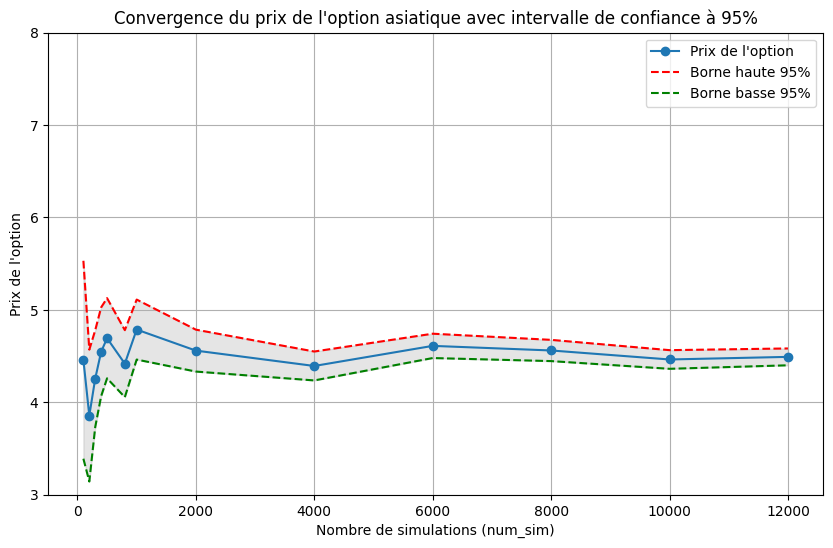

In [12]:
# Réduction de la variance par variable de contrôle
# Nous utiliserons le prix moyen de l'actif sur la période comme variable de contrôle


# Plage de valeurs pour num_sim
num_sim_values = [100, 200, 300, 400, 500, 800, 1000, 2000, 4000, 6000, 8000,10000,12000]

# Stockage des résultats
prix_options = []
borne_haute_95 = []
borne_basse_95 = []
erreurs_vc = []
for sim in num_sim_values:
    # Simulation des trajectoires du sous-jacent
    dt = T / 504  # 252 jours opérationnels
    nbr_pas = int(T / dt)
    S = np.zeros(shape=(nbr_pas, sim))  # Initialisation de la matrice des valeurs du sous-jacent
    W = np.random.normal(0, np.sqrt(dt), size=(nbr_pas, sim))  # Initialisation de la matrice des mouvements browniens
   
    S[0, :] = S0  # Initialisation de la première ligne à S0
    for col in range(np.size(S, axis=1)):
        for ligne in range(1, np.size(S, axis=0)):
            S[ligne, col] = S[ligne - 1, col] * np.exp((r - ((sigma ** 2) / 2)) * dt + sigma * W[ligne, col])  # Calcul de St à chaque pas de temps

    # Calcul des moyennes des prix
    S_mean = np.mean(S,axis=0)
    # Calcul des payoffs pour l'option asiatique de type "average price"
    P_ap = np.zeros(shape=(1, sim))
    for i in range(sim):
        P_ap[0, i] = np.maximum(S_mean[i] - K, 0)
        
    # Calcul de la matrice de covariance
    cov_mat = np.cov(S_mean,P_ap)
    cov_SP = cov_mat[0,1]
    
    # Calcul du coefficient Beta optimisé 
    beta = - (cov_SP/np.var(S_mean))
    
    # Calcul de l'espérance de la moyenne des prix sur la période avec Black-Scholes
    T_mat = np.linspace(0, T, nbr_pas+1)
    E_S_mean = np.sum(S0*np.exp((r-(sigma**2)/2))*T_mat)/len(T_mat)
    
    # Calcul de l'estimateur du payoff
    
    P_est = np.zeros(shape=(1,sim))
    for i in range(sim):
        P_est[0, i] = P_ap[0,i] + beta*(S_mean[i] - E_S_mean)

    # Calcul de la valeur moyenne des payoffs estimés
    mean_payoff = np.mean(P_est)
    
    prix_option = mean_payoff * np.exp(-r * T)  # Actualisation du payoff moyen pour obtenir le prix de l'option
    prix_options.append(prix_option)  

    erreur = np.std(P_est) / np.sqrt(sim)  # Calcul de l'erreur standard du payoff estimé
    erreurs_vc.append(erreur)
    borne_haute_95.append(prix_option + 1.96 * erreur)  # Calcul et ajout de la borne haute de l'intervalle de confiance à 95%
    borne_basse_95.append(prix_option - 1.96 * erreur)  # Calcul et ajout de la borne basse de l'intervalle de confiance à 95%
    print(f"Erreur standard pour {sim} simulations en utilisant une variable de contrôle : {erreur}")


plt.figure(figsize=(10, 6))
plt.plot(num_sim_values, prix_options, label="Prix de l'option", marker='o')
plt.plot(num_sim_values, borne_haute_95, label="Borne haute 95%", linestyle='--', color='red')
plt.plot(num_sim_values, borne_basse_95, label="Borne basse 95%", linestyle='--', color='green')
plt.fill_between(num_sim_values, borne_basse_95, borne_haute_95, color='gray', alpha=0.2)
plt.title("Convergence du prix de l'option asiatique avec intervalle de confiance à 95%")
plt.xlabel("Nombre de simulations (num_sim)")
plt.ylabel("Prix de l'option")
plt.ylim(3,8)
plt.legend()
plt.grid(True)
plt.show()

Erreur standard pour 100 simulations en utilisant les variables antithétiques: 0.9803662066484252
Erreur standard pour 200 simulations en utilisant les variables antithétiques: 0.808296999869766
Erreur standard pour 300 simulations en utilisant les variables antithétiques: 0.5541690017151358
Erreur standard pour 400 simulations en utilisant les variables antithétiques: 0.5756624477596153
Erreur standard pour 500 simulations en utilisant les variables antithétiques: 0.43977566547286573
Erreur standard pour 800 simulations en utilisant les variables antithétiques: 0.3861749732081584
Erreur standard pour 1000 simulations en utilisant les variables antithétiques: 0.31012839799611147
Erreur standard pour 2000 simulations en utilisant les variables antithétiques: 0.22911040962331955
Erreur standard pour 4000 simulations en utilisant les variables antithétiques: 0.16144419585828404
Erreur standard pour 6000 simulations en utilisant les variables antithétiques: 0.13297057422055605
Erreur stand

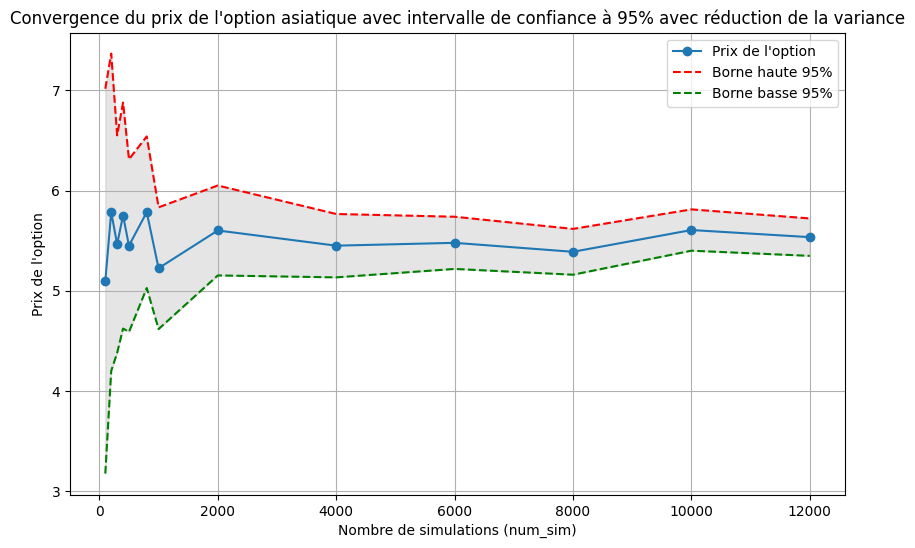

In [10]:
# Réduction de la variance par variables antithétiques

# Plage de valeurs pour num_sim
num_sim_values = [100, 200, 300, 400, 500, 800, 1000, 2000, 4000, 6000, 8000,10000,12000]

# Stockage des résultats
prix_options = []
borne_haute_95 = []
borne_basse_95 = []
erreurs_va = []
for sim in num_sim_values:
    # Simulation des trajectoires du sous-jacent
    dt = T / 504  # 252 jours opérationnels
    nbr_pas = int(T / dt)
    S = np.zeros(shape=(nbr_pas, sim))  # Initialisation de la matrice des valeurs du sous-jacent
    S2 = np.zeros(shape=(nbr_pas, sim)) # Initialisation de la matrice des valeurs du sous-jacent calculées avec les variables antithétiques
    W = np.random.normal(0, np.sqrt(dt), size=(nbr_pas, sim))  # Initialisation de la matrice des mouvements browniens
    W2 = -W # Matrice des variables antithétiques
    
   
    S[0, :] = S0  # Initialisation de la première ligne à S0
    S2[0, :] = S0  # Même procédé pour cette matrice
    for col in range(np.size(S, axis=1)):
        for ligne in range(1, np.size(S, axis=0)):
            S[ligne, col] = S[ligne - 1, col] * np.exp((r - ((sigma ** 2) / 2)) * dt + sigma * W[ligne, col])  # Calcul de St à chaque pas de temps
            S2[ligne, col] = S2[ligne - 1, col] * np.exp((r - ((sigma ** 2) / 2)) * dt + sigma * W2[ligne, col])

    
    # Calcul des moyennes des prix
    S_mean = np.mean(S, axis=0)
    S2_mean = np.mean(S2, axis=0)
    # Calcul des payoffs en utilisant les moyennes des prix pour la matrice classique et la matrice antithétique
    P_ap = np.zeros(shape=(1, sim))
    P2_ap = np.zeros(shape=(1, sim))
    for i in range(sim):
        P_ap[0, i] = np.maximum(S_mean[i] - K, 0)
        P2_ap[0, i] = np.maximum(S2_mean[i] - K, 0)
   

    # Calcul de la valeur moyenne des payoffs
    mean_payoff_list = 0.5 * (P_ap + P2_ap)
    mean_payoff = np.mean(mean_payoff_list)
    
    prix_option = mean_payoff * np.exp(-r * T)  # Actualisation du payoff moyen pour obtenir le prix de l'option
    prix_options.append(prix_option)  

    erreur = np.std(P_ap) / np.sqrt(sim) # Calcul de l'erreur standard du payoff
    erreurs_va.append(erreur)
    borne_haute_95.append(prix_option + 1.96 * erreur)  # Calcul et ajout de la borne haute de l'intervalle de confiance à 95%
    borne_basse_95.append(prix_option - 1.96 * erreur)  # Calcul et ajout de la borne basse de l'intervalle de confiance à 95%
    print(f"Erreur standard pour {sim} simulations en utilisant les variables antithétiques: {erreur}")

plt.figure(figsize=(10, 6))
plt.plot(num_sim_values, prix_options, label="Prix de l'option", marker='o')
plt.plot(num_sim_values, borne_haute_95, label="Borne haute 95%", linestyle='--', color='red')
plt.plot(num_sim_values, borne_basse_95, label="Borne basse 95%", linestyle='--', color='green')
plt.fill_between(num_sim_values, borne_basse_95, borne_haute_95, color='gray', alpha=0.2)
plt.title(r"Convergence du prix de l'option asiatique avec intervalle de confiance à 95% avec réduction de la variance")
plt.xlabel("Nombre de simulations (num_sim)")
plt.ylabel("Prix de l'option")
plt.legend()
plt.grid(True)
plt.show()

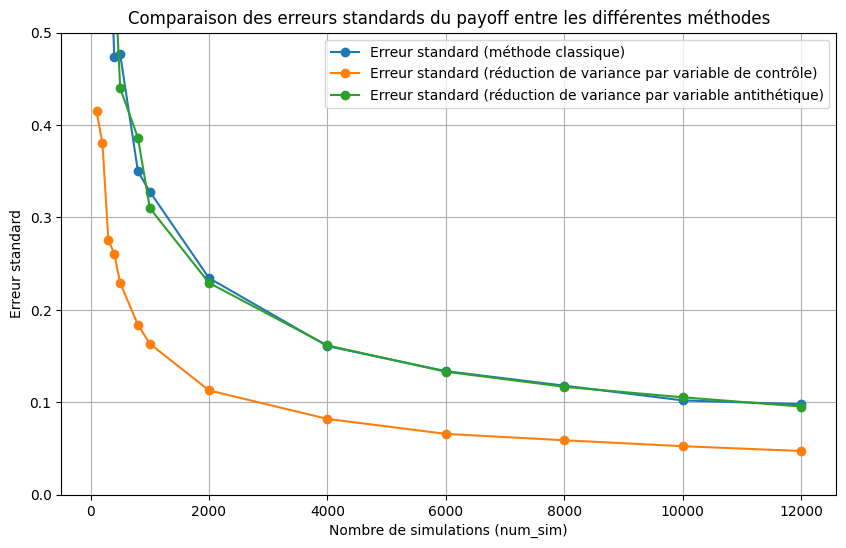

In [11]:
plt.figure(figsize=(10, 6))


# Tracer les erreurs de la méthode classique
plt.plot(num_sim_values, erreurs, label="Erreur standard (méthode classique)", marker='o')

# Tracer les erreurs de la réduction de variance par variable de contrôle
plt.plot(num_sim_values, erreurs_vc, label="Erreur standard (réduction de variance par variable de contrôle)", marker='o')

# Tracer les erreurs de la réduction de variance par variable antithétique
plt.plot(num_sim_values, erreurs_va, label="Erreur standard (réduction de variance par variable antithétique)", marker='o')
plt.ylim(0, 0.5)
plt.title("Comparaison des erreurs standards du payoff entre les différentes méthodes")
plt.xlabel("Nombre de simulations (num_sim)")
plt.ylabel("Erreur standard")
plt.legend()
plt.grid(True)
